In [1]:
cd("/home/ritaferi/Phd/SSDdev")
using Pkg
Pkg.activate(".")
Pkg.instantiate()

using SolidStateDetectors
using Unitful
using Plots
using LegendHDF5IO

  Activating project at `~/Phd/SSDdev`


--------------

In questo notebook lavoro con il problema del campo eletterico (guarda presentazione di Claudia)

# 0.05 tick grid

In [ ]:
max_tick_distance = 0.05u"mm"
refinement_limits = [0.2, 0.1, 0.05, 0.02]
V_bias = 3500u"V" 

3500 V

In [3]:
sim05 = Simulation(SSD_examples[:InvertedCoax])
sim05.detector = SolidStateDetector(sim05.detector, contact_id=2, contact_potential=V_bias);

In [4]:

ssd_write("notebooks/sim05.h5", sim05)

┌ Warning: Destination `notebooks/sim05.h5` already exists. Overwriting...
└ @ SolidStateDetectors.SolidStateDetectorsLegendHDF5IOExt /home/ritaferi/Phd/SolidStateDetectors/SolidStateDetectors.jl/ext/SolidStateDetectorsLegendHDF5IOExt.jl:15


In [5]:
sim05 = ssd_read("notebooks/sim05.h5", Simulation)

Simulation{Float32, Cylindrical} - Coordinate system: Cylindrical
  Environment Material: Vacuum
  Detector: Public Inverted Coax
  Electric potential: missing
  Charge density: missing
  Impurity scale: missing
  Fix Charge density: missing
  Dielectric distribution: missing
  Point types: missing
  Electric field: missing
  Weighting potentials: 
    Contact 1: missing
    Contact 2: missing


In [ ]:
# ATTENZIONE  A VEDERE SE IL POTENZIALE E' DEPLETED O NO
calculate_electric_potential!(sim05,
    refinement_limits= missing,
    verbose=false, #  boolean in the output is produced or not
    depletion_handling=false,  # se true : motiplica epsilon_r per un fattore f nelle regioni non svuotate
    grid=Grid(sim05, max_tick_distance=max_tick_distance))

Entro in Grid
vediamo come va
electric potential


In [7]:

ssd_write("notebooks/sim05.h5", sim05)
sim05 = ssd_read("notebooks/sim05.h5", Simulation)

┌ Warning: Destination `notebooks/sim05.h5` already exists. Overwriting...
└ @ SolidStateDetectors.SolidStateDetectorsLegendHDF5IOExt /home/ritaferi/Phd/SolidStateDetectors/SolidStateDetectors.jl/ext/SolidStateDetectorsLegendHDF5IOExt.jl:15


Simulation{Float32, Cylindrical} - Coordinate system: Cylindrical
  Environment Material: Vacuum
  Detector: Public Inverted Coax
  Electric potential: (816, 1, 2008)
  Charge density: (816, 1, 2008)
  Impurity scale: (816, 1, 2008)
  Fix Charge density: (816, 1, 2008)
  Dielectric distribution: (817, 2, 2009)
  Point types: (816, 1, 2008)
  Electric field: missing
  Weighting potentials: 
    Contact 1: missing
    Contact 2: missing


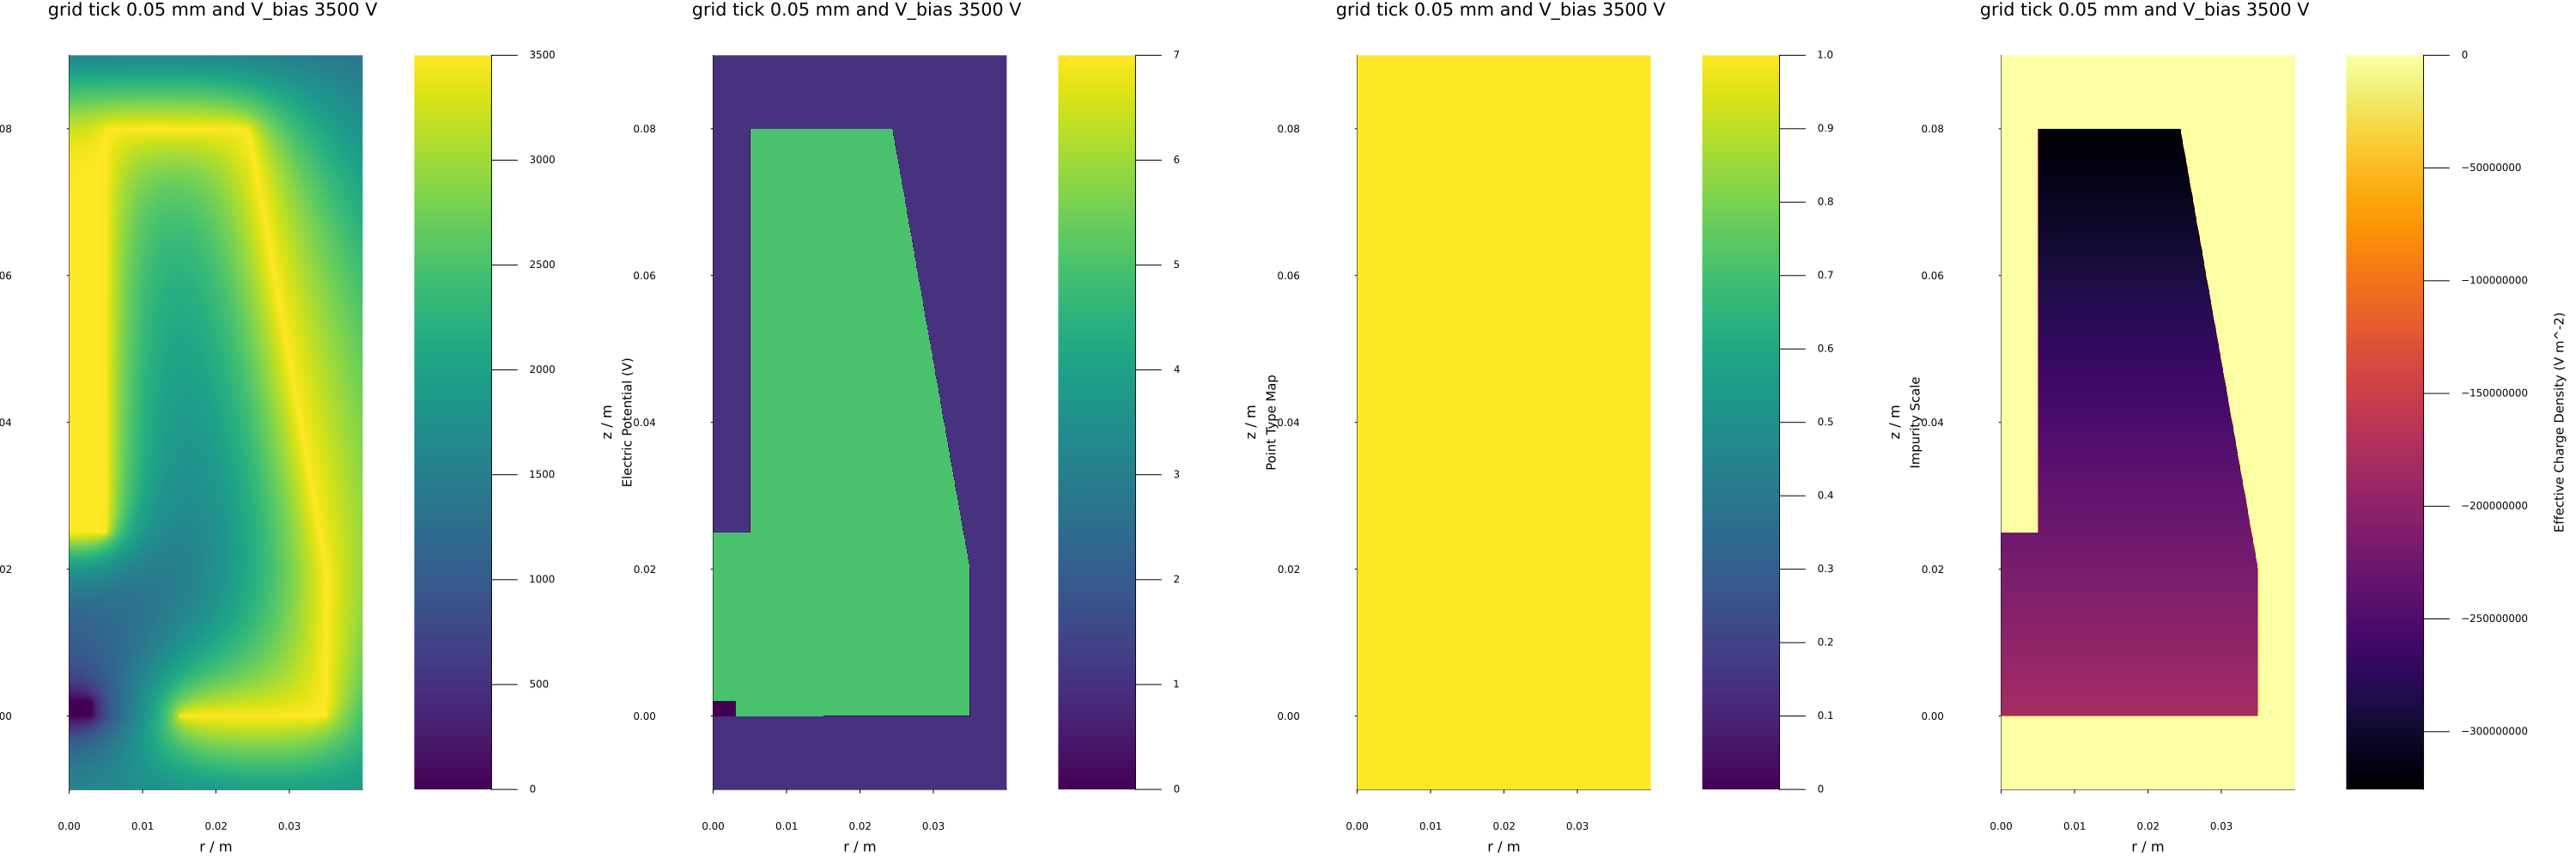

In [8]:
plot(
    plot(sim05.electric_potential, φ = 0), # initial electric potential (boundary conditions)
    plot(sim05.point_types), # map of different point types: fixed point / inside or outside detector volume / depleted/undepleted
    plot(sim05.imp_scale), # impurity scale
    plot(sim05.q_eff_imp), # charge density distribution
    layout = (1, 4), size = (3000, 1000),
    title = "grid tick $max_tick_distance and V_bias $V_bias "
)

In [38]:
sim05 # dopo che ho calcolato il campo elettrico si riempiono i campi della simulazione

Simulation{Float32, Cylindrical} - Coordinate system: Cylindrical
  Environment Material: Vacuum
  Detector: Public Inverted Coax
  Electric potential: (816, 1, 2008)
  Charge density: (816, 1, 2008)
  Impurity scale: (816, 1, 2008)
  Fix Charge density: (816, 1, 2008)
  Dielectric distribution: (817, 2, 2009)
  Point types: (816, 1, 2008)
  Electric field: missing
  Weighting potentials: 
    Contact 1: missing
    Contact 2: missing


In [39]:
impurity = sim05.imp_scale ;


In [9]:
V_bias

3500 V

---------

# 0.02 tick grid

In [11]:
max_tick_distance = 0.02u"mm"
refinement_limits = 0.2
V_bias = 3500u"V"

3500 V

In [13]:


sim02 = Simulation(SSD_examples[:InvertedCoax])
sim02.detector = SolidStateDetector(sim02.detector, contact_id=2, contact_potential=V_bias);
ssd_write("notebooks/sim02.h5", sim02)

┌ Warning: Destination `notebooks/sim02.h5` already exists. Overwriting...
└ @ SolidStateDetectors.SolidStateDetectorsLegendHDF5IOExt /home/ritaferi/Phd/SolidStateDetectors/SolidStateDetectors.jl/ext/SolidStateDetectorsLegendHDF5IOExt.jl:15


In [14]:
sim02 = ssd_read("notebooks/sim02.h5", Simulation)

Simulation{Float32, Cylindrical} - Coordinate system: Cylindrical
  Environment Material: Vacuum
  Detector: Public Inverted Coax
  Electric potential: missing
  Charge density: missing
  Impurity scale: missing
  Fix Charge density: missing
  Dielectric distribution: missing
  Point types: missing
  Electric field: missing
  Weighting potentials: 
    Contact 1: missing
    Contact 2: missing


In [ ]:
calculate_electric_potential!(sim02,
    refinement_limits=refinement_limits,
    verbose=false, #  boolean in the output is produced or not
    depletion_handling= false,  # se true : undepleted. motiplica epsilon_r per un fattore f nelle regioni non svuotate
    grid=Grid(sim02, max_tick_distance=max_tick_distance))

In [ ]:
ssd_write("notebooks/sim02.h5", sim02)
sim02 = ssd_read("notebooks/sim02.h5", Simulation)

plot(
    plot(sim02.electric_potential, φ = 0), # initial electric potential (boundary conditions)
    plot(sim02.point_types), # map of different point types: fixed point / inside or outside detector volume / depleted/undepleted
    plot(sim02.imp_scale), # impurity scale
    plot(sim02.q_eff_imp), # charge density distribution
    layout = (1, 4), size = (3000, 1000)
)